<a href="https://colab.research.google.com/github/Abhi08ch/CodVeda-Technologies/blob/main/L3_Task_2_SVM_for_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LEVEL-3**

# **Task 2: SVM for Binary Classification**

In [1]:
# Step 1: Load and Prepare the Data
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("/content/churn-bigml-80.csv")

# Convert Churn column to 1/0
df['Churn'] = df['Churn'].astype(int)

# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

# Features and labels
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [2]:
#  Step 2: Scale Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
# Step 3: Train SVM with Linear Kernel
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Linear Kernel SVM
svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train_scaled, y_train)

# Predictions
y_pred_linear = svm_linear.predict(X_test_scaled)
y_probs_linear = svm_linear.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Linear SVM Classification Report:\n", classification_report(y_test, y_pred_linear))
print("Linear SVM ROC-AUC Score:", roc_auc_score(y_test, y_probs_linear))


Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       456
           1       0.39      0.14      0.21        78

    accuracy                           0.84       534
   macro avg       0.63      0.55      0.56       534
weighted avg       0.80      0.84      0.81       534

Linear SVM ROC-AUC Score: 0.7345366621682412


In [4]:
#  Step 4: Train SVM with RBF Kernel
# RBF Kernel SVM
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rbf = svm_rbf.predict(X_test_scaled)
y_probs_rbf = svm_rbf.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("RBF SVM Classification Report:\n", classification_report(y_test, y_pred_rbf))
print("RBF SVM ROC-AUC Score:", roc_auc_score(y_test, y_probs_rbf))


RBF SVM Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       456
           1       0.64      0.12      0.20        78

    accuracy                           0.86       534
   macro avg       0.76      0.55      0.56       534
weighted avg       0.83      0.86      0.82       534

RBF SVM ROC-AUC Score: 0.8270636527215475


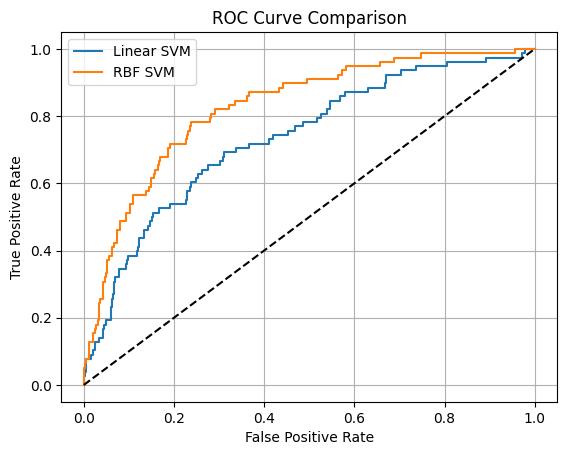

In [5]:
# Step 5: Plot ROC Curve
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_probs_linear)
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_probs_rbf)

plt.plot(fpr_linear, tpr_linear, label='Linear SVM')
plt.plot(fpr_rbf, tpr_rbf, label='RBF SVM')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()
